This notebook analyzes data from https://github.com/HuthLab/deep-fMRI-dataset. To set up, see instructions in the `deep-fMRI-dataset` folder.

In [7]:
import sys
sys.path.append('..')
import encoding_utils, feature_spaces
viz_cortex = __import__('03_viz_cortex')
calc_resp_PCs = __import__('00_calc_resp_decomp')
from os.path import join
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

# Look at text of input stories

In [ ]:
# Look at narrative stories
train_stories, test_stories, allstories = encoding_utils.get_allstories([1, 2, 3, 4, 5])
wordseqs = feature_spaces.get_story_wordseqs(allstories)
' '.join(wordseqs['sloth'].data)

# Look at responses

In [5]:
train_stories, test_stories, allstories = encoding_utils.get_allstories([1, 2, 3, 4, 5])
subject = 'UTS03'
zRresp = encoding_utils.get_response(train_stories, subject)

In [6]:
zRresp.shape

(9461, 95556)

In [ ]:
viz_cortex.quickshow(zRresp[100])

**Look at PCA stuff**

In [6]:
pca = pkl.load(open(join(calc_resp_PCs.out_dir, 'resps_pca.pkl'), 'rb'))['pca']

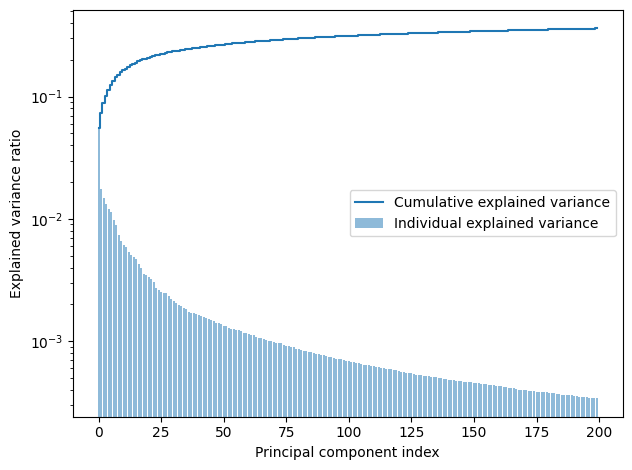

In [10]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
n = 200
plt.bar(range(0, n), exp_var_pca[:n], alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0, n), cum_sum_eigenvalues[:n], where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.yscale('log')
plt.show()